# R-Programming in the Jupyter Environment: A Practical Tutorial on Rock Harmony Analysis

This notebook provides an extension of the first example of Kris Shaffer's tutorial [Exploring musical data with R: An introduction to computational music analysis](https://pushpullfork.com/exploring-musical-data-with-r/), which introduces frequency distribution tables and related plots of overall chord instances in David Temperley's (dt) RS 5 x 20 corpus.

Article: Trevor de Clercq and David Temperley (2011). A corpus analysis of rock harmony. *Popular Music* 30(1), p. 47-70. 

Things to learn:
- Description of nominal data
- Data management: 
 - for-loop
 - if-condition
 - the idea of vectorisation
- Graphical options

Data required: resultsBySong.csv  
Libraries required: none

Date: 02-02-2019   
Author: timovarelmann@uni-koeln.de  

**List of contents**

- [Short Intro: R-Programming in the Jupyter Environment](#intro)
- [The Dataset](#data)
- [Getting started: Identification of pre- and post-tonics](#start)
 - [Selecting columns, rows, and single elements](#sel)
 - [Overall frequency distribution of chromatic relative roots](#overfreq)
- [Frequency distribution of pre- and post-tonics](#freqDist)
 - [Identification of pre- and post tonic chords in the dataset: Intro](#label)
 - [Identification of post-tonics by for-loop and if-statement](#post)
 - [Identification of pre-tonics by for-loop and if-statement](#pre)
- [Chord transition table](#chtrans)
 - [Vectorisation](#vectorisation)
 - [Frequency distribution of all post-tonics](#freqvec)
 - [Frequencies of chord transitions in the whole corpus](#whole)
 - [Visualisation of the chord transition table by mosaic plot](#mosaic)

## Short Intro: R-Programming in the Jupyter Environment<a name="intro">

### What is R?

- Programming language
- Environment within which statistical techniques are implemented

R provides
- effective data management and storage facilities
- operators for calculations on data structures like vectors, matrices, dataframes
- a large integrated collection of functions for data analysis
- graphical facilities for data analysis and display in publication quality
- effective programming language which includes conditionals, loops, user-defined functions and more

(https://www.r-project.org/)

#### Extensions
The [Comprehensive R Archive Network](https://cran.r-project.org) (CRAN) offers [more than 10.000](https://blog.revolutionanalytics.com/2017/01/cran-10000.html) high quality, well documented open-source packages for data analysis and graphical functions.

Further packages are published 
- by [bioconductor](https://www.bioconductor.org) open source software for bioinformatics
- on GitHub
- ...

### R-Programming in Jupyter

#### The Notebook Environment

The Jupyter Notebook offers a distinct graphical user interface for R-programming and its applications for data management, analysis and graphical display.

Jupyter notebooks consist of a sequence of cells:
- Code
- Markdown
- Raw

#### Code Cell

The R kernel for the Jupyter environment executes R code which the Jupyter Notebook's code cells submit to the kernel.

Running a selected code cell executes *all* code of that cell.

Remember: There are several ways to run a selected cell, e.g.:

Run the selected cells and advance:
- Press *Shift+Enter* , or:
- Press the icon

See more options and shortcuts in the *Run*  - Tasklist.

#### Markdown

Markdown cells are used for several purposes. In this notebook, markdown is used:
- to provide an overall structure to the notebook
- for explanations and comments
- for syntax highlighting
- to insert formulae and links
- to create a (single) table

#### Workspace
The Jupyter Notebook is an active working environment that includes any objects defined within that notebook. Defined data and values remain active until shutdown of the kernel session.

In [82]:
a <- 5

In [83]:
a

[1] 5

#### Working Directory
The working directory (wd) is the location in the file system where files are stored or from where files are imported. 

In Jupyter, the working directory is automatically set at the location within the Jupyter file system where the notebook is stored. 

If data files (or others) are stored within the same folder, setting the working directory is not required for operations like reading data.

Read the dataset `resultsBySong.csv`.

Execute the following code to read the data:

`dt <- read.csv('resultsBySong.csv')`

## The Dataset<a name="data">

de Clercq and Temperley (2011) used the Rolling Stone magazine's list of **"500 Greatest Songs of All Time"**. From each of 5 decades 1950s to 1990s, they took the 20 top-ranked songs and provided annotations by hand.

The data only provide David Temperley's (*dt*) annotations of the RS 5*20 Corpus.

Show the first and last six rows of the data:

`head(dt)`

Function `tail()` provides the last rows of the data (6 by default).    

We can use additional `print()` for typical R-display (which covers more information, e.g. row indices:

`print(tail(dt))`

To understand what these data represent, take a look at the beginning of the chord list for Temperleys analysis of 'Hey Jude', cq. figure 3 in DeClercq + Temperley 2011:

`head(dt[dt$song=="hey_jude_dt",],3)`

In [96]:
head(dt[dt$song=="hey_jude_dt",],3)

,song,start,end,RN,relChr,relDia,tonic,abs
3039,hey_jude_dt,0,1,I,0,1,5,5
3040,hey_jude_dt,1,3,V,7,5,5,0
3041,hey_jude_dt,3,4,I,0,1,5,5


This is a chord list. A single row provides information on a given chord until progression to another one.
- **song**: name of song

Timeline of measures: measure 1 starts at 0, measure 2 at 1.0, ...
- **start**: start of a new chord
- **end**: end of that chord

In [97]:
head(dt[dt$song=="hey_jude_dt",],3)

,song,start,end,RN,relChr,relDia,tonic,abs
3039,hey_jude_dt,0,1,I,0,1,5,5
3040,hey_jude_dt,1,3,V,7,5,5,0
3041,hey_jude_dt,3,4,I,0,1,5,5


Harmony:
- **RN**: Roman numeral label, e.g. I64 for an 64-inversion of the tonic I
- **relChr**: The "chromatic relative root", i.e. the root as a chromatic interval above the tonic:   
e.g. I is 0, V is 7
- **relDia**: Diatonic relative root: I is 1, II is 2 ...
- **tonic**: the key in pitch-class terms. F=5, C=0, ...
- **abs**: the root in absolute terms, referring to te pitch-class. The tonic in pitch class F=5 is 5, the dominant in pitch class F=5 is 0.

Listen to the song, and compare to the first 20 rows of the chord list for Hey Jude (The Beatles):

`head(dt[dt$song=="hey_jude_dt",],20)`

In [98]:
head(dt[dt$song=="hey_jude_dt",],20)

,song,start,end,RN,relChr,relDia,tonic,abs
3039,hey_jude_dt,0.0,1.0,I,0,1,5,5
3040,hey_jude_dt,1.0,3.0,V,7,5,5,0
3041,hey_jude_dt,3.0,4.0,I,0,1,5,5
3042,hey_jude_dt,4.0,5.0,IV,5,4,5,10
3043,hey_jude_dt,5.0,6.0,I,0,1,5,5
3044,hey_jude_dt,6.0,7.0,V,7,5,5,0
3045,hey_jude_dt,7.0,9.0,I,0,1,5,5
3046,hey_jude_dt,9.0,11.0,V,7,5,5,0
3047,hey_jude_dt,11.0,12.0,I,0,1,5,5
3048,hey_jude_dt,12.0,13.0,IV,5,4,5,10


We will use the information on *chromatic relative roots* for our descriptive analyses:

- **Overall frequency distribution of chromatic relative roots**
- **Frequency distribution of pre- and post-tonics**
- **Frequency distribution of all chord transitions**

## Getting started: Identification of pre- and post-tonics<a name="start">

Let's show the overall structure of the data:

`str(dt)`

The data structure is a 2-dimensional dataframe, covering 9.300 observations (here: annotations) of the 8 variables described above.

### Selecting columns, rows, and single elements<a name="sel">

Did you notice the `$`-sign in the list of all variables? 
We can make use of that sign do take a subset of a specified column from the dataframe:

`dt$song` will produce a (1-dimensional) vector of all songs. Let's print it:

The length of `dt$song` (i.e. the number of elements) equals the number of rows of dataframe `dt`:

`length(dt$song)`   
`nrow(dt)`

The numbers in brackets indicate the position of vectors, e.g. `[2]` for the second element of the vector:

In [ ]:
print(dt$song)

This position index can be used to specify elements in the vector. 

For example, `dt$song[2000]` will return the 2000th vector element:

Please remember that we used a vector (`2000` is a vector with length 1) to specify elements in another vector:

In [18]:
print(2000)

[1] 2000


**Small exercise**: Specify the position index in such a way that it always returns the *second to last* element of a vector. 

It should work even if you don't know the number of elements of your vector. 

A dataframe like `dt` is 2-dimensional. To specify subsets of a data frame, we thus need two indices in brackets:

The first index refers to rows, the second the columns: 
    
`dt[row,col]`

`dt[3,]` returns the third row as a vector   
`dt[,3]` returns the third column as a vector   
`dt[3,3]` returns only the data entry in third row, third column as a vector

## Overall frequency distribution of chromatic relative roots<a name="overfreq">

As a first step, we create a frequency distribution table of the chromatic relative roots, the *chromatic intervals of roots above the tonic*: `dt$relChr`. 

Remember: the tonic takes value 0, dominant is 7, sub-dominant is 5, ...

The function we need is `table()`:

`table(dt$relChr)`

You can now rank the chromatic relative roots by their frequency of occurence using `sort()`:

`sort(table(dt$relChr))`

Or reverse it in order to return the frequencies of occurence from highest to lowest:

`rev(sort(table(dt$relChr)))`

The following code produces a barplot of the overall frequency distribution:

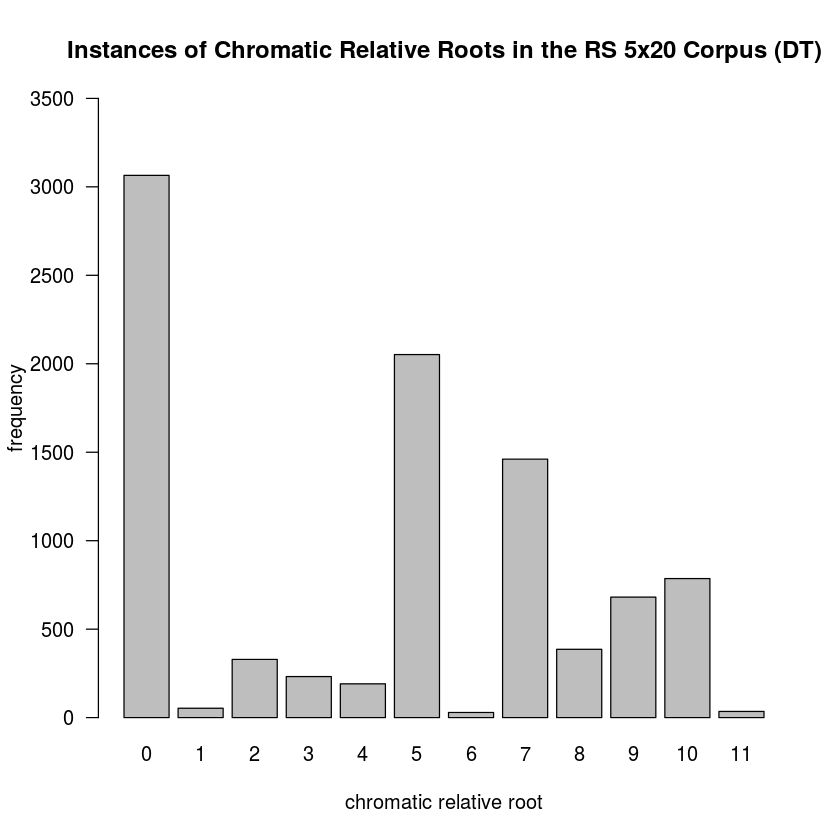

In [7]:
barplot(table(dt$relChr),                                                         # take the fequency distribtion table as data for plotting
        main="Instances of Chromatic Relative Roots in the RS 5x20 Corpus (DT)",  # specify the main title as indicated by a character string
        ylab="frequency", xlab="chromatic relative root",                         # make the plot literate by specification of y and x labels
        ylim=c(0,3500),  las=1)                                                   # extra's': specification of y-axis limits and the orientation of axis labels

We will now create an extended distribution table of chromatic relative roots in the RS 5x20 corpus (cq. DeClercq + Temperley 2011, page 60). This table should cover:
- **Instances**: absolute frequencies of chrom. rel. roots
- **Proportional of total**: relative frequencies of chrom. rel. roots
- **Song instances**: number of songs that cover at least one of the chrom. rel. roots (e.g. 39 song instances with root 2 means: in 39 of all songs there is at least one II)

Remember that   
"Root I"  equals `dt$relChr == 0`,   
"Root bII" equals `dt$relChr == 1`, ...   
"Root VII" equals `dt$relChr == 11`

For column "Instances", here's the frequency distribution table again. For columnar orientation of tabular data, use function `cbind()`:

`cbind(table(dt$relChr))`

In [ ]:
cbind(table(dt$relChr))

Assign this to an object called `instances`:

`instances <- cbind(table(dt$relChr))`

In [27]:
instances <- cbind(table(dt$relChr))

For column "Proportion of total", create a table of relative frequencies. This can be done by use of the additional function `prop.table()`, which converts the absolute frequencies in the table to relative frequencies:

`prop.table(cbind(table(dt$relChr)))`

Rounding these numbers to three decimal places is provided by additional `round()`:

`round(prop.table(cbind(table(dt$relChr))),3)`

In [105]:
round(prop.table(cbind(table(dt$relChr))),3)

0,0.330
1,0.006
2,0.035
3,0.025
4,0.021
5,0.221
6,0.003
7,0.157
8,0.042
9,0.073
10,0.085


In [30]:
prop <- round(prop.table(cbind(table(dt$relChr))),3)

Creation of column "Song instances" is a bit more difficult.    
As a first step to understand the strategy, start with a subset of dataframe `dt` consisting of only those *rows* for which `dt$relChr == 1`. 

`dt[dt$relChr == 1,]`

In other words, here are all occurances of the relative chromatic root 1 (i.e. dimished subdominant parallel bII) within the corpus.

Now, `dt[dt$relChr == 1,1]` returns only the first column of that subset (i.e. the song names) as a vector:

Use function `print()` to show additional information of that subset (vector indices)

`print(dt[dt$relChr == 1, 1])`

In [107]:
print(dt[dt$relChr == 1, 1])

 [1] heartbreak_hotel_dt        in_bloom_dt               
 [3] in_bloom_dt                in_bloom_dt               
 [5] in_bloom_dt                in_bloom_dt               
 [7] in_bloom_dt                in_bloom_dt               
 [9] in_bloom_dt                in_bloom_dt               
[11] in_bloom_dt                in_bloom_dt               
[13] in_bloom_dt                in_bloom_dt               
[15] in_bloom_dt                living_for_the_city_dt    
[17] living_for_the_city_dt     living_for_the_city_dt    
[19] living_for_the_city_dt     living_for_the_city_dt    
[21] living_for_the_city_dt     london_calling_dt         
[23] london_calling_dt          london_calling_dt         
[25] london_calling_dt          london_calling_dt         
[27] london_calling_dt          london_calling_dt         
[29] london_calling_dt          london_calling_dt         
[31] london_calling_dt          london_calling_dt         
[33] london_calling_dt          london_calling_dt       

Function `unique()`extracts unique elements of a vector.    

Use that function here to return all unique names of songs in which at least one dimished subdominant parralel occurs:

In [111]:
print(unique(dt[dt$relChr == 1, 1]))

[1] heartbreak_hotel_dt        in_bloom_dt               
[3] living_for_the_city_dt     london_calling_dt         
[5] smells_like_teen_spirit_dt
99 Levels: 1999_dt a_change_is_gonna_come_dt ... yesterday_dt


Finally, count the elements of that vector by computing its length, function: `length()`:

In [112]:
length(unique(dt[dt$relChr == 1, 1]))

[1] 5

Thus, 5 is the number of songs in which at least one diminished subdominant parallel occurs.


To make the code more flexible, use a variable that should index the chromatic relative roots, let's call it `i`. 

Replace the value which equals `dt$relChr` accordingly.

For `i = 1`, we will get the same result:

In [113]:
length(unique(dt[dt$relChr == 1, 1]))

[1] 5

Following this strategy, song instances can now be computed *for all chromatic relative roots from 0 to 11*. 

This is translated to the R language as follows:

( `0:11` is a sequence of integers)

`for (i in 0:11) {
    length(unique(dt[dt$relChr == i, 1]))
}`

There is no output here because all song instances have been computed within the for-loop (internally). 

Use `print()` as instruction to return a distinct output for every iteration of i:

`for (i in 0:11) {
    print(length(unique(dt[dt$relChr == i, 1])))
}`

Here, we will assign the output to an object (I called it `song.inst`). This stores the output for later reuse:

`for (i in 0:11) {
    song.inst <- length(unique(dt[dt$relChr == i, 1]))
}`

Return the result:

What happened?

For every iteration of i over the sequence 0 to 11, object `song.inst` has been changed. For `i = 11`object `song.inst` has been overwritten for the last time, thus the resulting outcome of that loop is 7.

To create a resulating vector whose elements are the outcomes of each for-loop iteration, combine the result in a current iteration with the results of the preceded ones using `c()`:  
`song.inst <- c(song.inst, length(unique(dt[dt$relChr == i, 1])))`.

Note that before you start the for-loop, you need an (empty) vector `song.inst <- c()` in order to combine it with the outcome in the first iteration of the loop.

In [40]:
song.inst <- c()
for (i in 0:11) {
    song.inst <- c(song.inst,length(unique(dt[dt$relChr == i, 1])))
}
print(song.inst)

 [1] 99  5 38 18 24 89  5 87 21 40 37  7


This is the resulting vector of song instances. 

As a last step, use `cbind()` for columnar bindung of the three result-vectors:

`distr_table <- cbind(instances, prop, song.inst)`

In [41]:
distr_table <- cbind(instances, prop, song.inst)

and define the column names:

In [42]:
colnames(distr_table) <- c("Instances", "Proportion of total", "Song instances")

In [ ]:
print(distr_table)

## Frequency distribution of pre- and post-tonics<a name="freqDist">
Until now, only the *overall destribution* of chromatic relative roots has been calculated. Let's now turn to chord progressions within the dataset. 

The first aim is to calculate the frequency of occurrence of pre- and post-tonic chords in terms of chromatic relative roots.

### Identification of pre- and post tonic chords in the dataset<a name="label">

This is an example of how to create labels based on criteria which have to be met. The criteria are: pre-tonic and post-tonic.

Expand the dataframe with two columns called pre and post that will finally contain that information. In the first place, assign empty character strings to these new columns:

`dt$pre <- ""
dt$post <- ""`

Take a look at the header:

In [27]:
print(head(dt))

     song start  end  RN relChr relDia tonic abs pre post
1 1999_dt   7.0  7.5 I64      0      1     5   5         
2 1999_dt   7.5  8.0 V11      7      5     5   0         
3 1999_dt   8.0  8.5 I64      0      1     5   5         
4 1999_dt   8.5  9.0 V11      7      5     5   0         
5 1999_dt   9.0  9.5 I64      0      1     5   5         
6 1999_dt   9.5 10.0 V11      7      5     5   0         


#### Identification of post-tonics by for-loop and if-statement<a name="post">

For identification of post-tonic chords, one has first to identify the tonics.

Within the corpus, tonics are indicated by:
- Roman numeral labels `I` (major), `i` (minor) and inversions like `I64`
- Diatonic relative root `1`: In `dt$relDia`, number one always and exclusively indicates the tonic, no matter whether it is actually minor, major, or an inversion.
- Chromatic relative root `0`: In `dt$relChr`, number zero always and exclusively indicates the tonic, no matter whether it is actually minor or major.
Here, we will take the chromatic relative root `0` as an indicator of tonics.

`dt$relChr == 0` gives a logical vector which elements are TRUE if the condition "equals zero" is met. Compare:

In [28]:
print(head(dt$relChr))      # Head of vector dt$relChr
print(head(dt$relChr == 0)) # Head of the logical vector

[1] 0 7 0 7 0 7
[1]  TRUE FALSE  TRUE FALSE  TRUE FALSE


Take a look at the first row of the data frame. In the song "1999", a tonic occurs in the first half of measure 7, which is row 1. As such, a post-tonic occurs in row 2 (here, it's the dominant).  
Thus, row 2 should be labeled as post-tonic:

In [29]:
print(head(dt,2))

     song start end  RN relChr relDia tonic abs pre post
1 1999_dt   7.0 7.5 I64      0      1     5   5         
2 1999_dt   7.5 8.0 V11      7      5     5   0         


Now take a variable that should index the row-numbers, let's call it `i`. 

In row 2, thus for `i=2`, we may add a label called "postI" in column dt$post:

`dt$post[i] <- "postI"`

because in the row before, the following condition is met:

`dt$relChr[i-1] == 0`

We can translate this to an if-statement

**if** `dt$relChr[i-1] == 0`   
**then** `dt$post[i] <- "postI"`
   
which is coded in R:

`if (dt$relChr[i-1] == 0) {`  
&nbsp;&nbsp;&nbsp;`dt$post[i] <- "postI"`  
&nbsp;&nbsp;&nbsp;`}`

We need to test the if-condition in all rows from row 2 to the last row. As such, the if-condition will be build into a for-loop which specifies the iteration of index i over that sequence of rows.

**Try it**

Now take a look at the header:

In [ ]:
print(head(dt))

Let's also take a look to some other rows in the dataframe, say, at rows 342 to 347:

Row 343 gives information about the last chord of the song *1999*, which is the tonic.    
Row 344 gives information about the first chord of the song *All apologies*.

Our code did not consider this case: the first chord of the song *All apologies* has been classified as a post-tonic ... this is definitely wrong as the first chord of a song cannot be considered as a post tonic.

As such, we need a second condition which prevents first chords of a song to be erroneously labelled as post-tonic. Song name `dt$song[i-1]` must equal `dt$song[i]`.

Only if both conditions `if ((dt$relChr[i-1] == 0) & (dt$song[i-1]==dt$song[i]))` are met, the chord in row `i` will be anotated as post-tonic.

In [47]:
dt$post <- ""

for (i in 2:nrow(dt)) {
    if ((dt$relChr[i-1] == 0) & (dt$song[i-1]==dt$song[i]))  {
        dt$post[i] <- "postI"
    }
}

In [48]:
print(dt[342:347,])

                song  start   end   RN relChr relDia tonic abs  post
342          1999_dt 182.25 182.5 bVII     10      7     5   3 postI
343          1999_dt 182.50 183.0    I      0      1     5   5      
344 all_apologies_dt   0.00  24.0    I      0      1     1   1      
345 all_apologies_dt  24.00  30.0   IV      5      4     1   6 postI
346 all_apologies_dt  30.00  34.0    V      7      5     1   8      
347 all_apologies_dt  34.00  50.0    I      0      1     1   1      


It worked!

Finally, create a frequency distribution table of posttonics:   
`table()`:

In [ ]:
table(dt[dt$post == "postI",5])

And a barplot of that frequencies:   
`barplot()`

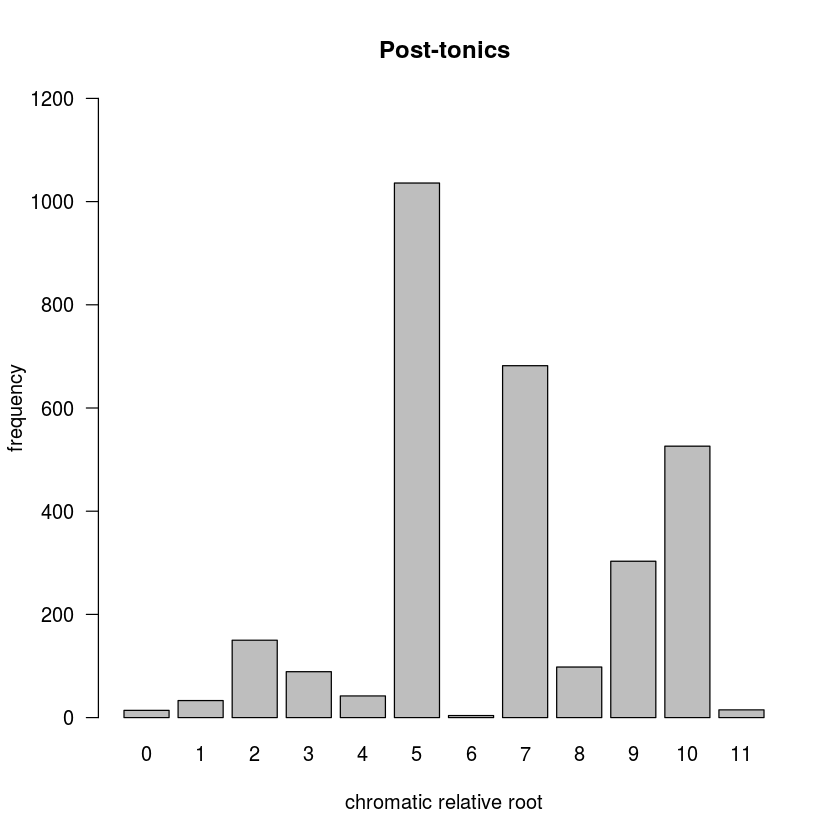

In [11]:
barplot( table(dt[dt$post == "postI",5]) ,          
        main="Post-tonics",                                      # specify the main title as indicated by a character string
        ylab="frequency", xlab="chromatic relative root",        # make the plot literate by specification of y and x labels
        ylim=c(0,1200),  las=1)                                  # specification of y-axis limits and the orientation of axis labels


#### Identification of pre-tonics by for-loop and if-statement<a name="pre">

The coding strategy to identify and label the pre-tonics is quite similar.
    
**Try it!**

## Chord transition table<a name="chtrans">

The combination of for-loop and if-condition to label data provides an intuitive way to deal with chord motions in the dataset. But there are some disadvantages. 

Take a look at this table (cq. 3 in DeClercq + Temperley 2011, p.61). This should become a frequency distribution table of all combinations of antecedent and consequent chords in the corpus.   
Rows names indicate antecedent chords, column names indicate consequent chords:

| .  | 0 | 1 | 2 | 3 | ... |
|---|---|---|---|---|-----|
|**0**|    
|**1**|
|**2**|
|**3**|
|**...**|

If we were to label all possible combinations of antecedent and consequent chords, this would take a lot of time for coding.   
Also, it would take a lot of processing ressources to do so. For every single iteration of i, the if-condition has to be checked and the vectors `dt$pre` or `dt$post` have to be updated. In each repetition, memory has to be re-allocated.

### Vectorisation<a name="vectorisation">

**Vectorisation** provides a way to save coding and processing ressources and time. Read [Noam Ross: Vectorization in R: Why?](http://www.noamross.net/blog/2014/4/16/vectorization-in-r--why.html) to catch the idea of vectorisation in detail.

Here is an example. Say we have a set of 50000 randomly generated integers between 1 and 50000

In [49]:
a <- sample(1:50000, size=50000, replace=TRUE)
length(a)      # is 50000
print(head(a)) # first six elements

[1] 50000

[1]  8280 13237 38968 10204 16510 40982


and we want to create a subset of all odd numbers.

Identification of odd numbers:

In [50]:
a[4]
a[4] %% 2 != 0

[1] 10204

[1] FALSE

For identifying all odd numbers in the data, a strategy similar to our labelling of post- and pre-tonics above would be this:

In [115]:
odds1 <- c()
for (i in 1:length(a)) {
    if(a[i] %% 2 != 0) {       # for all odd numbers, the result of modulo division a[i] %% 2, the division remainder, is not 0
        odds1 <- c(odds1,a[i]) # element by element, vector odds1 is created
    }
}

Instead of iterating the check-update-process for 50000 times, this vectorised code does the same in two ...

In [53]:
odds.logical <- a %% 2 != 0    

`odds.logical` is a logical vector, `TRUE` for division remainders unequal 0

In [54]:
odds2 <- a[odds.logical]

assigns all elements of vector a for which the related logical vector element is TRUE

Here's the same one step:

In [ ]:
odds2 <- a[a %% 2 != 0]  

Did you notice the difference in processing time? R performs these operations on whole vectors (here with length = 50000), not for every single vector element.

The strategy of vectorisation, combined with a for-loop of only 12 iterations, will finally be used here to create a matrix of all possible combinations of ante- and consequent chords.

### Frequency distribution of all post-tonics<a name="freqvec">

To understand this process, first create a frequency distribution table of post-tonics, i.e. the consequent chords of the tonic I, in terms of chromatic relative roots. The result must be the same as we have achieved above by labelling post-tonics.

We will start with the `which()`-function, asking: "Which indices are TRUE for the condition `dt$relChr == 0`?", providing a vector of **positions** of tonics in `dt$relChr`

`which(dt$relChr == 0)`

In [57]:
print(head(which(dt$relChr == 0)))

[1]  1  3  5  7  9 11


Take this vector to specify the rows in `dt` that provide information on *post*-tonic chords:

`dt[which(dt$relChr == 0)+1,]`

In [58]:
print(head(dt[which(dt$relChr == 0)+1,]))

      song start end  RN relChr relDia tonic abs  post
2  1999_dt   7.5   8 V11      7      5     5   0 postI
4  1999_dt   8.5   9 V11      7      5     5   0 postI
6  1999_dt   9.5  10 V11      7      5     5   0 postI
8  1999_dt  10.5  11 V11      7      5     5   0 postI
10 1999_dt  11.5  12 V11      7      5     5   0 postI
12 1999_dt  12.5  13 V11      7      5     5   0 postI


The 5th column provides the chomatic relative roots of these post-tonics:

`dt[which(dt$relChr == 0)+1,5]`

In [65]:
cons_all <- dt[which(dt$relChr == 0)+1,5]
print(head(cons_all))

[1] 7 7 7 7 7 7


This is a numerical vector of all post-tonic chromatic relative roots 

Remember that we need a second condition which prevents first chords of a new song to be erroneously labelled as post-tonic of previous songs ending with a tonic.

The song names (first column) in rows that represent the tonics (`dt[which(dt$relChr == 0),1]`) must equal the song names of consequent rows that represent the post-tonics `dt[which(dt$relChr == 0)+1,]`:

`dt[which(dt$relChr == 0),1] == dt[which(dt$relChr == 0)+1,1]`

In [66]:
cons_same <- dt[which(dt$relChr == 0),1] == dt[which(dt$relChr == 0)+1,1]
print(head(cons_same))

[1] TRUE TRUE TRUE TRUE TRUE TRUE


This is a logical vector which is FALSE for consequent chords of tonics that do not belong to the same song. 

To show that this is the case, take a look at rows 339 to 352 of the dataframe dt:

In column `dt$relChr`, chromatic relative roots following 0 (the tonic) are 10 (same song: TRUE), 10 (same song: TRUE), 0 (same song: FALSE), 5 (same song: TRUE), 5 (same song: TRUE), 7 (same song: FALSE). This is exactly the information of vectors `cons_all` and `cons_same`:

In [68]:
print(cons_all[165:170])
print(cons_same[165:170])

[1] 10 10  0  5  5  7
[1]  TRUE  TRUE FALSE  TRUE  TRUE FALSE


Now, take `cons_same` as position index vector of `cons_all` in order to exclude all consequent chromatic relative roots of tonic that do not belong to the same song:

In [69]:
cons <- cons_all[cons_same]

We are almost there. Our labelling of post-tonics by for-loop and if-statement provided a total of 2992 elements:

In [ ]:
length(dt[dt$post == "postI",5])

Instead, vectorisation provided a vector of post-tonics with ...

In [ ]:
length(cons)

We created an `NA` in the last position of that vector:

In [ ]:
print(tail(cons))

Take again a look at the data frame, here are the last rows:

In [ ]:
print(tail(dt))

By indentification of post-tonics &mdash; `dt[which(dt$relChr == 0)+1,5]` &mdash; a post-tonic would also be expected in row 9301 which is not available (NA). 

As a last step, exclude that `NA` from vector `cons` by:

In [73]:
cons <- cons[!is.na(cons)]

`!is.na(cons)` is `TRUE` for all elements of `cons` that are not `NA`

In [ ]:
print(tail(cons))

This may seem a long way to achieve the goal, but finally only a few steps were needed to create a vector of all consequent chromatic relative roots of tonics:

`cons_all   <- dt[which(dt$relChr == 0)+1,5]
cons_same  <- dt[which(dt$relChr == 0),1] == dt[which(dt$relChr == 0)+1,1]
cons       <- cons_all[cons_same]
cons       <- cons[!is.na(cons)]`

In [76]:
cons_all   <- dt[which(dt$relChr == 0)+1,5]
cons_same  <- dt[which(dt$relChr == 0),1] == dt[which(dt$relChr == 0)+1,1]
cons       <- cons_all[cons_same]
cons       <- cons[!is.na(cons)]

Here is the frequency distribution table:

In [77]:
table(cons)

cons
   0    1    2    3    4    5    6    7    8    9   10   11 
  14   33  150   89   42 1036    4  682   98  303  526   15 

If we did the same for `dt$relChr == 1`, this would be the resulting frequency distribution:

In [117]:
cons_all   <- dt[which(dt$relChr == 1)+1,5]
cons_same  <- dt[which(dt$relChr == 1),1] == dt[which(dt$relChr == 1)+1,1]
cons       <- cons_all[cons_same]
cons       <- cons[!is.na(cons)]

In [79]:
table(cons)

cons
 0 11 
38 14 

The term `table(factor(cons,lev=0:11))` guarantees that a frequencies = 0 are included into the table.

In [80]:
table(factor(cons,lev=0:11))


 0  1  2  3  4  5  6  7  8  9 10 11 
38  0  0  0  0  0  0  0  0  0  0 14 

### Frequencies of chord transitions in the whole corpus<a name="whole">

What has been done above can be transferred to a for-loop in order to achieve a transition frequency distribution table called `transTable` which is structured like:


| .  | 0 | 1 | 2 | 3 | ... |
|---|---|---|---|---|-----|
|**0**|    
|**1**|
|**2**|
|**3**|
|**...**|

How can we achieve this?  
Remeber that we already coded the first two rows separately.

Finally, specify the row-names of that transition table:   
`rownames(transTable) <- 0:11`

### Visualisation of the chord transition table by mosaic plot<a name="mosaic">

The mosaic plot is suitable for visualisation of relative frequencies of data from two or more qualitative variables. The proportions of areas within the plot correspond to relative frequencies of values.

To achieve a plot that takes the same orientation of rows and columns in matrix `transTable`, you have to transpose the transition table (which is a matrix) using `t()`. This is due to the function's settings.

    
Matrix

$M = \begin{bmatrix}1 & 4 \\ 2 & 5 \\ 3 & 6 \end{bmatrix}$

can be transformed by exchanging rows with columns:

$M^T = \begin{bmatrix}1 & 2 & 3 \\ 4 & 5 & 6 \end{bmatrix}$

Here is the mosaic plot of `transTable`:

In [ ]:
mosaicplot(t(transTable))

And here is an advanced mosaic plot of `transTable`: After generating and defining some graphical options of the plot, text has been added fostering literacy of that plot. The plot roughly demonstrated differences frequencies of occurence of specific chord movements in relation to others, but also loses information about absolute or relative frequencies of occurence. It could be argued that such information should be added at least to some areas within the plot that should be highlighted.

In [ ]:
mosaicplot(t(transTable),         # argument x, here the transposed matrix transTable
           las=1, cex.axis=0.75,  # orientation and relative size of axis labels
           col=c("grey1","grey9","grey17","grey25","grey33","grey41","grey49","grey57",
                 "grey65","grey73","grey81","grey89"), # colors for each row of the matrix
           main="",               # here: empty character string as main-title
           sub="Mosaic Plot of Chord Transitions in the RS 5x20 Corpus (dt)") # instead, title below the plot

#<----- By now the mosaicplot has been created. What follows is adding text to that plot -------->#

mtext("consequent chromatic relative root", side=3)       # mtext() is used instead of xlab to add text above the plot, side=3
mtext("antecedent chromatic relative root", side=2)       # for consistency, mtext() is also used instead of ylab

text(2/12,0.66,"IV-I")    # text() places some text at a specified position (x,y) within the plot;
text(2/12,0.38,"V-I")   
text(2/12,0.058,"bVII-I")
text(0.525,0.76,"I-IV",col="white")
text(0.525,0.3,"V-IV")
text(0.7,0.76,"I-V",col="white")
text(0.7,0.34,"IV-V")
text(0.933,0.76,"I-",col="white")
text(0.933,0.72,"bVII",col="white")

**Thank you for your attention!**